## **Stochastic Relative Strength Index(StochRSI)**
---
Conditions:
*   https://www.investopedia.com/terms/s/stochrsi.asp
*   https://www.investopedia.com/terms/r/rsi.asp
*   RSI period - 14 days

### 1. Libraries

In [64]:
#Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 2. Download the data from yahoofinance or CSV file

In [65]:
# a) Load the data from csv file
#from google.colab import files
#files.upload()

In [66]:
# b) Load the data from yahoofinance
df = yf.download('AAPL', start= '2021-01-01', end='2021-10-01')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.876999,99116600,2020-12-31
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900,2021-01-04
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900,2021-01-05
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824326,155088000,2021-01-06
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,2021-01-07


### 3. Stochastic Relative Strength Index


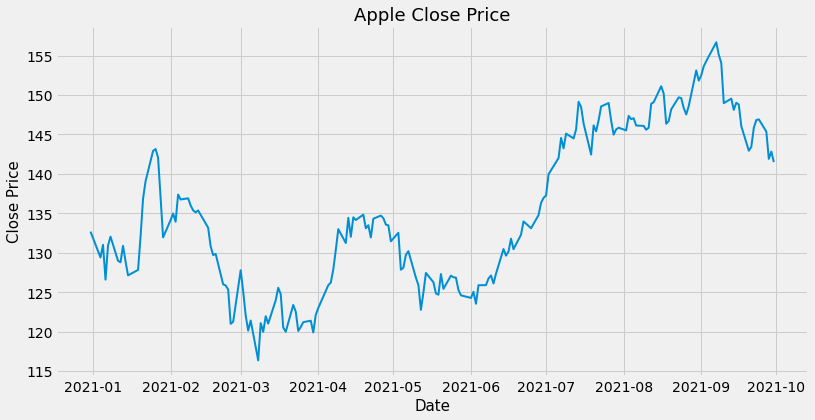

In [67]:
#Visually show and plot the close price
plt.figure(figsize=(12,6))
plt.title('Apple Close Price', fontsize=18)
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.show()

In [68]:
#Create a Exponential Moving Average indicator function
def EMA(data, period=14, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()

In [69]:
#Create a function to calculate the Stochastic Relative Strength Index
def StochRSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up'] = up
    data['down'] = down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs( EMA(data, period, column='down') )
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))

    stockrsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())

    return stockrsi

In [70]:
#Store the stochastic RSI data in a new column
df['StochRSI'] = StochRSI(df)
#Show the data
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,up,down,StochRSI
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.876999,99116600,2020-12-31,NaN,NaN,NaN
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900,2021-01-04,0.000000,-3.279999,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900,2021-01-05,1.599991,0.000000,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824326,155088000,2021-01-06,0.000000,-4.409996,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200,2021-01-07,4.320000,0.000000,NaN


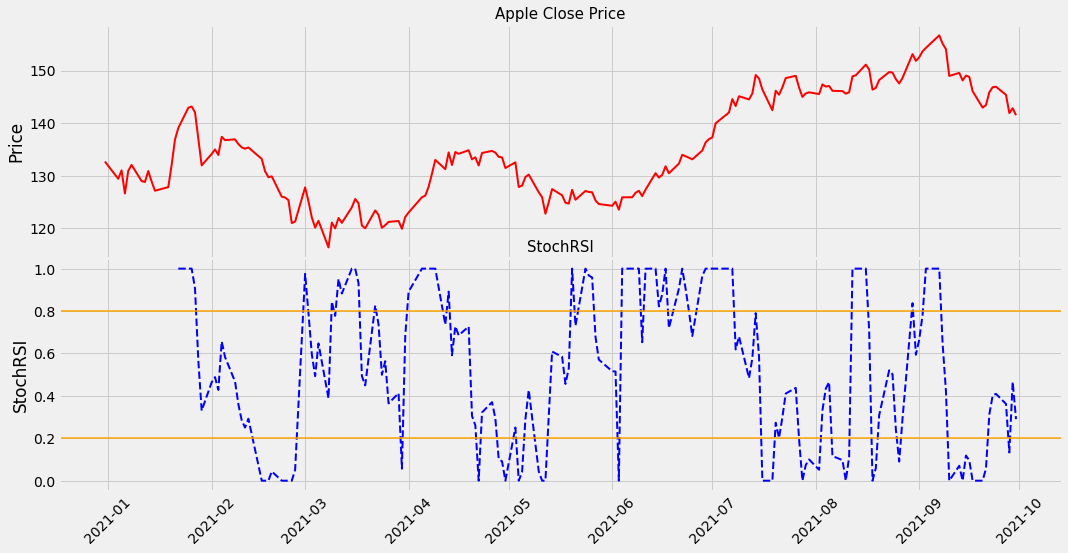

In [82]:
#Plot the data
#Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(16,8))
#Remove the vertical gap between the subplots
plt.subplots_adjust(hspace=0.0)
#Plot the close price
ax1.plot(df.index, df['Close'], color = 'r', linewidth=2)
#Plot the StochRSI
ax2.plot(df.index, df['StochRSI'], color = 'b', linestyle='--', linewidth=2)
#Plot the oversold (0.2) and overbought (0.8)
ax2.axhline(0.20, color='orange', linewidth=1.5)
ax2.axhline(0.80, color='orange', linewidth=1.5)
#Set grid lines
ax1.grid(1)
ax2.grid(1)
#Set plot title
ax1.set_title('Apple Close Price', fontsize=15)
ax2.set_title('StochRSI', fontsize=15)
#Rotate the xticks by 45 degrees
plt.xticks(rotation=45)
plt.show()